<a href="https://colab.research.google.com/github/iversonzpy/MachineLearning/blob/master/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [0]:
def gauss_2d(mu, sigma, k):
  x0 = np.random.normal(mu, sigma, k)
  x1 = np.random.normal(mu, sigma, k)
  return np.column_stack((x0, x1))

In [0]:
def data_prepare():
  k = 1000
  x1 = gauss_2d(1, 1 , k)
  y1 = np.ones(k)
  x2 = gauss_2d(-1, 3, k)
  y2 = -np.ones(k)
  x = np.concatenate((x1, x2), axis = 0)
  y = np.concatenate((y1, y2), axis = 0)
  return (x, y)

In [0]:
# 2000 training set, 2000 test set
# (a) C = 1, gamma = {0.1, 1, 10, 100, 1000}

data_train, target_train = data_prepare()
data_test, target_test = data_prepare()


In [0]:
def train_with_c_gamma(c_value, gamma_value, kernel):
# (a) C = 1, gamma = {0.1, 1, 10, 100, 1000}
  clf = SVC(C = c_value, kernel = kernel, gamma = gamma_value)
  clf.fit(data_train, target_train)
  score = clf.score(data_test, target_test) # accuracy 
  sv = clf.support_vectors_ # support_vectors

  print('Number of support vectors found: ' + str(len(sv)))
  print('Accuracy on test set: ' + str(score))
  # plot

  plt.figure(1, figsize=(8, 6))
  plt.clf()
  plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k')
  x_min = -10
  x_max = 10
  y_min = -10
  y_max = 10

  XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
  Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
  Z = Z.reshape(XX.shape)
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
  plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
              levels=[-.5, 0, .5])
  plt.show() 

Number of support vectors found: 574
Accuracy on test set: 0.8875


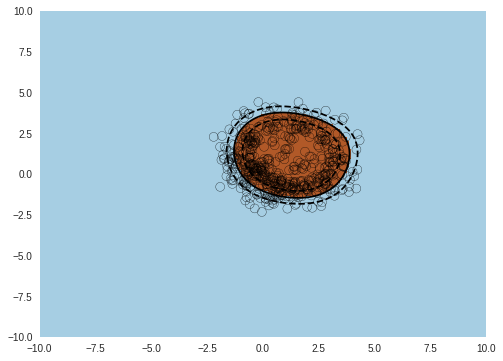

Number of support vectors found: 738
Accuracy on test set: 0.887


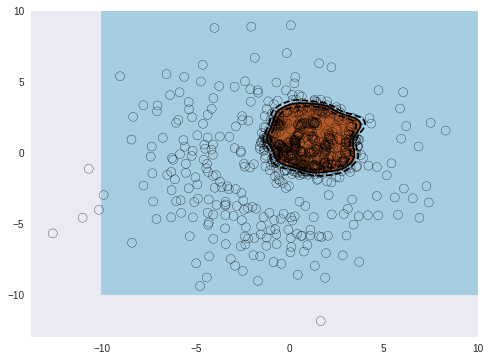

Number of support vectors found: 1316
Accuracy on test set: 0.8795


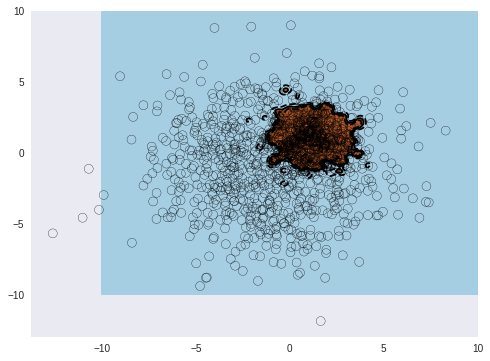

Number of support vectors found: 1819
Accuracy on test set: 0.8365


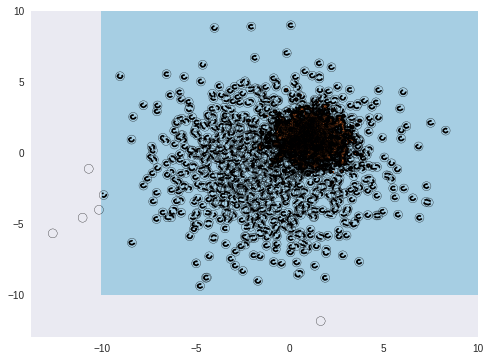

Number of support vectors found: 1982
Accuracy on test set: 0.663


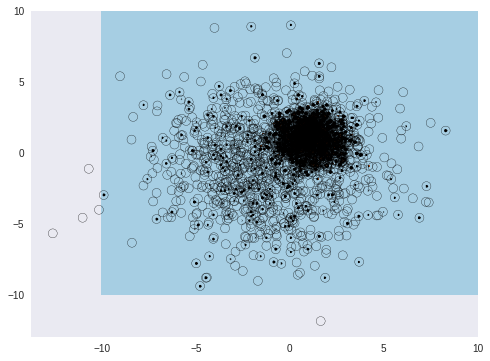

In [6]:
train_with_c_gamma(1, 0.1, 'rbf')
train_with_c_gamma(1, 1, 'rbf')
train_with_c_gamma(1, 10, 'rbf')
train_with_c_gamma(1, 100, 'rbf')
train_with_c_gamma(1, 1000, 'rbf')


Number of support vectors found: 1100
Accuracy on test set: 0.795


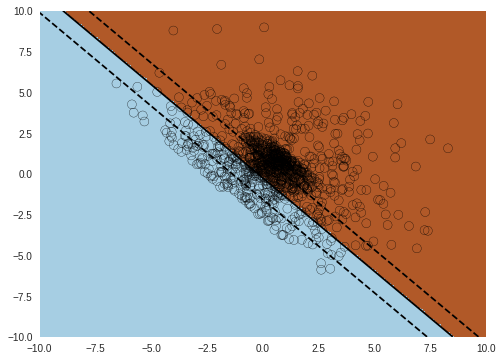

Number of support vectors found: 1100
Accuracy on test set: 0.795


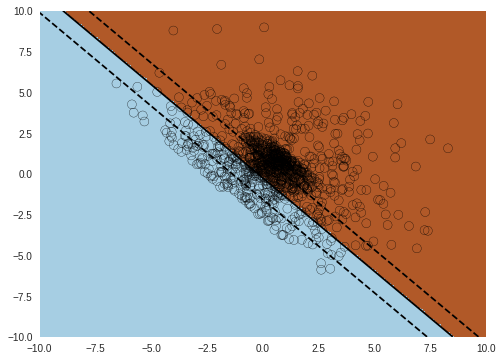

Number of support vectors found: 1100
Accuracy on test set: 0.795


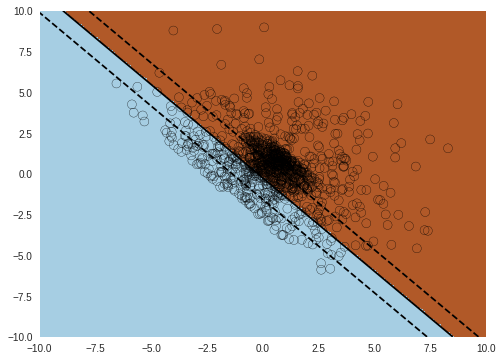

Number of support vectors found: 1100
Accuracy on test set: 0.795


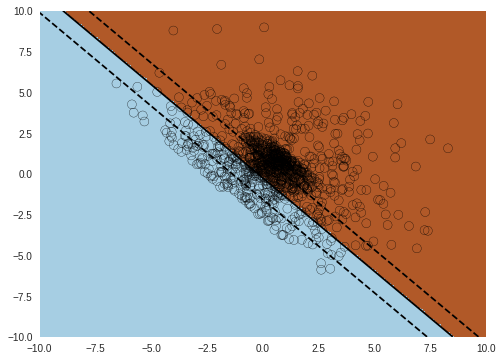

Number of support vectors found: 1100
Accuracy on test set: 0.795


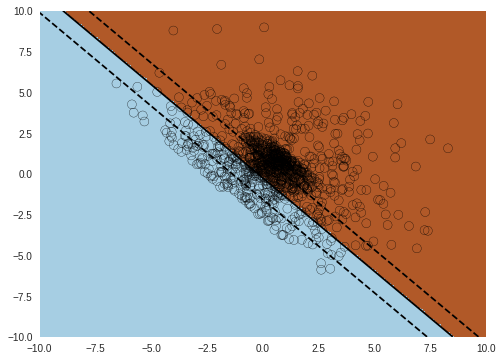

In [7]:
train_with_c_gamma(1, 0.1, 'linear')
train_with_c_gamma(1, 1, 'linear')
train_with_c_gamma(1, 10, 'linear')
train_with_c_gamma(1, 100, 'linear')
train_with_c_gamma(1, 1000, 'linear')